<a href="https://colab.research.google.com/github/kridtapon/RSI-Momentum-Breakout/blob/main/RSI_Momentum_Breakout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.5 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate RSI (Relative Strength Index)
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate Stochastic RSI
def calculate_stochastic_rsi(df, rsi_period=14, stoch_period=14):
    df['RSI'] = calculate_rsi(df, period=rsi_period)
    min_rsi = df['RSI'].rolling(window=stoch_period).min()
    max_rsi = df['RSI'].rolling(window=stoch_period).max()
    df['Stochastic_RSI'] = (df['RSI'] - min_rsi) / (max_rsi - min_rsi)
    return df

# Function to calculate Moving Average Envelope
def calculate_ma_envelope(df, ma_period=20, envelope_percentage=0.02):
    df['MA'] = df['Close'].rolling(window=ma_period).mean()
    df['Upper_Envelope'] = df['MA'] * (1 + envelope_percentage)
    df['Lower_Envelope'] = df['MA'] * (1 - envelope_percentage)
    return df

# Define the stock symbol and time period
symbol = 'META'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Stochastic RSI
df = calculate_stochastic_rsi(df)

# Calculate Moving Average Envelope
df = calculate_ma_envelope(df)

# Define Entry and Exit signals based on Stochastic RSI and Moving Average Envelope
df['Entry'] = (df['Stochastic_RSI'] > 0.20) & (df['Close'] > df['Upper_Envelope'])
df['Exit'] = (df['Stochastic_RSI'] < 0.80) & (df['Close'] < df['Lower_Envelope'])

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sharpe_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'calmar_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'omega_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sortino_ratio' requires frequency to be set
  warnings.warn(warning_message)


Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                            186406.66866
Total Return [%]                        86.406669
Benchmark Return [%]                   180.172856
Max Gross Exposure [%]                      100.0
Total Fees Paid                        8480.87648
Max Drawdown [%]                        57.803608
Max Drawdown Duration                       733.0
Total Trades                                   34
Total Closed Trades                            34
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            38.235294
Best Trade [%]                          48.184416
Worst Trade [%]                         -9.651243
Avg Winning Trade [%]                    14.61056
Avg Losing Trade [%]                    -4.796702


In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from itertools import product

# Function to calculate RSI
def calculate_rsi(df, period):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Function to calculate Stochastic RSI
def calculate_stochastic_rsi(df, rsi_period, stoch_period):
    df['RSI'] = calculate_rsi(df, period=rsi_period)
    min_rsi = df['RSI'].rolling(window=stoch_period).min()
    max_rsi = df['RSI'].rolling(window=stoch_period).max()
    df['Stochastic_RSI'] = (df['RSI'] - min_rsi) / (max_rsi - min_rsi)
    return df

# Function to calculate Moving Average Envelope
def calculate_ma_envelope(df, ma_period, envelope_percentage):
    df['MA'] = df['Close'].rolling(window=ma_period).mean()
    df['Upper_Envelope'] = df['MA'] * (1 + envelope_percentage)
    df['Lower_Envelope'] = df['MA'] * (1 - envelope_percentage)
    return df

# Download stock data
symbol = 'C'
start_date = '2019-01-01'
end_date = '2025-01-01'
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Parameter ranges
rsi_period_range = range(5, 21, 3)
stoch_period_range = range(5, 21, 3)
ma_period_range = range(10, 51, 5)
envelope_percentage_range = [0.01, 0.02, 0.03, 0.04, 0.05]
sto_threshold_entry_range = [0.1, 0.2, 0.3]
sto_threshold_exit_range = [0.7, 0.8, 0.9]

# Optimize parameters
best_return = -np.inf
best_params = None
best_portfolio = None

for rsi_p, stoch_p, ma_p, env_p, sto_entry, sto_exit in product(
    rsi_period_range, stoch_period_range, ma_period_range,
    envelope_percentage_range, sto_threshold_entry_range, sto_threshold_exit_range):

    temp_df = df.copy()
    temp_df = calculate_stochastic_rsi(temp_df, rsi_p, stoch_p)
    temp_df = calculate_ma_envelope(temp_df, ma_p, env_p)

    # Filter data for the test period (2020-2025)
    df_filter = temp_df[(temp_df.index.year >= 2020) & (temp_df.index.year <= 2025)]

    df_filter['Entry'] = (df_filter['Stochastic_RSI'] > sto_entry) & (df_filter['Close'] > df_filter['Upper_Envelope'])
    df_filter['Exit'] = (df_filter['Stochastic_RSI'] < sto_exit) & (df_filter['Close'] < df_filter['Lower_Envelope'])

    portfolio = vbt.Portfolio.from_signals(
        close=df_filter['Close'], entries=df_filter['Entry'], exits=df_filter['Exit'], init_cash=100_000, fees=0.001)

    total_return = portfolio.total_return()

    if total_return > best_return:
        best_return = total_return
        best_params = (rsi_p, stoch_p, ma_p, env_p, sto_entry, sto_exit)
        best_portfolio = portfolio

# Display best parameters and performance
print(f"Best Parameters: RSI={best_params[0]}, Stoch={best_params[1]}, MA={best_params[2]}, Envelope={best_params[3]}, Entry={best_params[4]}, Exit={best_params[5]}")
print(best_portfolio.stats())
best_portfolio.plot().show()

Streaming output truncated to the last 5000 lines.
<ipython-input-12-5de89be042dd>:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-5de89be042dd>:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-5de89be042dd>:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Best Parameters: RSI=20, Stoch=17, MA=10, Envelope=0.01, Entry=0.3, Exit=0.7
Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           183952.749858
Total Return [%]                         83.95275
Benchmark Return [%]                     4.867288
Max Gross Exposure [%]                      100.0
Total Fees Paid                       11906.21548
Max Drawdown [%]                        38.376662
Max Drawdown Duration                       359.0
Total Trades                                   46
Total Closed Trades                            45
Total Open Trades                               1
Open Trade PnL                        -2695.26888
Win Rate [%]                            42.222222
Best Trade [%]                          47.305857
Worst Trade [%]                         -8.194869
Avg Winning Trade [%]  

YF.download() has changed argument auto_adjust default to True


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stochastic_RSI'] = (df['RSI'] - min_rsi) / (max_rsi - min_rsi)
<ipython-input-3-93c623119a2e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA'] = df['Close'].rolling(window=ma_period).mean()
<ipython-input-3-93c623119a2e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Upper_Envelope'] = df['MA'] * (


Walk-Forward Optimization Results:
   Year                   Best_Params  Test_Return
0  2020    (5, 5, 20, 0.05, 0.1, 0.7)     0.098396
1  2021   (11, 5, 20, 0.05, 0.1, 0.7)    -0.016428
2  2022  (20, 17, 10, 0.01, 0.3, 0.7)    -0.020932
3  2023  (20, 20, 10, 0.01, 0.3, 0.7)     0.225086
4  2024  (20, 17, 10, 0.01, 0.3, 0.7)     0.066549
5  2025   (14, 5, 10, 0.01, 0.2, 0.7)     0.000000


<ipython-input-3-93c623119a2e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = calculate_rsi(df, period=rsi_period)
<ipython-input-3-93c623119a2e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stochastic_RSI'] = (df['RSI'] - min_rsi) / (max_rsi - min_rsi)
<ipython-input-3-93c623119a2e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           154825.223596
Total Return [%]                        54.825224
Benchmark Return [%]                     4.867276
Max Gross Exposure [%]                      100.0
Total Fees Paid                       8195.682121
Max Drawdown [%]                        27.983231
Max Drawdown Duration                       634.0
Total Trades                                   34
Total Closed Trades                            33
Total Open Trades                               1
Open Trade PnL                       -2268.493443
Win Rate [%]                            48.484848
Best Trade [%]                          32.989488
Worst Trade [%]                        -10.624812
Avg Winning Trade [%]                     8.09854
Avg Losing Trade [%]                    -4.221542


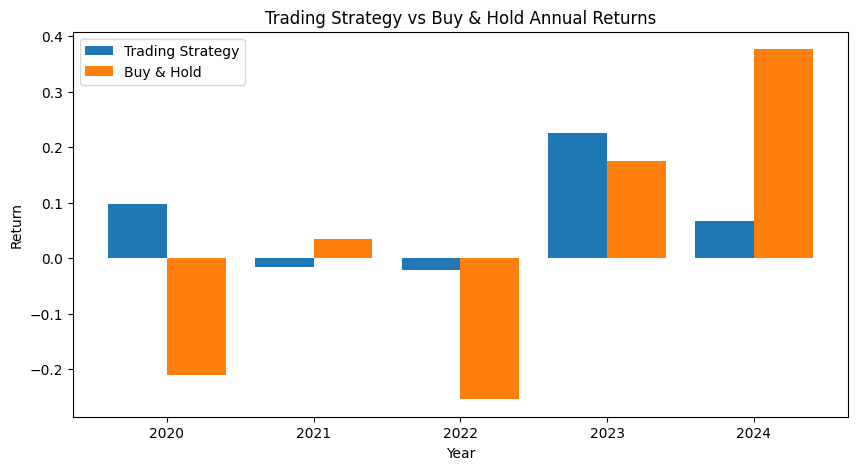

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import matplotlib.pyplot as plt
import itertools

# Function to calculate RSI (Relative Strength Index)
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate Stochastic RSI
def calculate_stochastic_rsi(df, rsi_period=14, stoch_period=14):
    df['RSI'] = calculate_rsi(df, period=rsi_period)
    min_rsi = df['RSI'].rolling(window=stoch_period).min()
    max_rsi = df['RSI'].rolling(window=stoch_period).max()
    df['Stochastic_RSI'] = (df['RSI'] - min_rsi) / (max_rsi - min_rsi)
    return df

# Function to calculate Moving Average Envelope
def calculate_ma_envelope(df, ma_period=20, envelope_percentage=0.02):
    df['MA'] = df['Close'].rolling(window=ma_period).mean()
    df['Upper_Envelope'] = df['MA'] * (1 + envelope_percentage)
    df['Lower_Envelope'] = df['MA'] * (1 - envelope_percentage)
    return df

# Define the stock symbol and time period
symbol = 'C' # TSLA! AAPL NQ=F ^GSPC FICO C! GE!
start_date = '2015-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Function to optimize strategy parameters
def walk_forward_optimization(df, start_year, end_year, rsi_period_range, stoch_period_range, ma_period_range, envelope_percentage_range, sto_threshold_entry_range, sto_threshold_exit_range):
    results = []

    for test_year in range(start_year + 4, end_year + 1):
        train_start = test_year - 4
        train_end = test_year - 1

        train_data = df[(df.index.year >= train_start) & (df.index.year <= train_end)]
        test_data = df[df.index.year == test_year]

        best_params = None
        best_performance = -np.inf

        # Loop through all combinations of the parameters
        for params in itertools.product(rsi_period_range, stoch_period_range, ma_period_range, envelope_percentage_range, sto_threshold_entry_range, sto_threshold_exit_range):
            rsi_period, stoch_period, ma_period, envelope_percentage, sto_threshold_entry, sto_threshold_exit = params

            # Calculate Stochastic RSI and Moving Average Envelope
            train_data = calculate_stochastic_rsi(train_data, rsi_period, stoch_period)
            train_data = calculate_ma_envelope(train_data, ma_period, envelope_percentage)

            # Generate entry and exit signals
            entries = (train_data['Stochastic_RSI'] > sto_threshold_entry) & (train_data['Close'] > train_data['Upper_Envelope'])
            exits = (train_data['Stochastic_RSI'] < sto_threshold_exit) & (train_data['Close'] < train_data['Lower_Envelope'])

            # Backtest on training data
            portfolio = vbt.Portfolio.from_signals(
                close=train_data['Close'],
                entries=entries,
                exits=exits,
                init_cash=100_000,
                fees=0.001
            )

            performance = portfolio.total_return()
            if performance > best_performance:
                best_performance = performance
                best_params = (rsi_period, stoch_period, ma_period, envelope_percentage, sto_threshold_entry, sto_threshold_exit)

        # Test with the best parameters on the test data
        # Extend the data range to include the previous year for indicator calculation
        test_data = df[(df.index.year >= test_year - 1) & (df.index.year <= test_year)]
        test_data = calculate_stochastic_rsi(test_data, best_params[0], best_params[1])
        test_data = calculate_ma_envelope(test_data, best_params[2], best_params[3])

        # Keep only the second year to avoid missing values from indicator calculation
        test_data = test_data[test_data.index.year == test_year]

        entries = (test_data['Stochastic_RSI'] > best_params[4]) & (test_data['Close'] > test_data['Upper_Envelope'])
        exits = (test_data['Stochastic_RSI'] < best_params[5]) & (test_data['Close'] < test_data['Lower_Envelope'])

        portfolio = vbt.Portfolio.from_signals(
            close=test_data['Close'],
            entries=entries,
            exits=exits,
            init_cash=100_000,
            fees=0.001
        )

        results.append({
            'Year': test_year,
            'Best_Params': best_params,
            'Test_Return': portfolio.total_return()
        })

    return pd.DataFrame(results)

# Define the parameter ranges to optimize
rsi_period_range = range(5, 21, 3)
stoch_period_range = range(5, 21, 3)
ma_period_range = range(10, 51, 5)
envelope_percentage_range = [0.01, 0.02, 0.03, 0.04, 0.05]
sto_threshold_entry_range = [0.1, 0.2, 0.3]
sto_threshold_exit_range = [0.7, 0.8, 0.9]

# Perform walk-forward optimization
results = walk_forward_optimization(df, 2016, 2025, rsi_period_range, stoch_period_range, ma_period_range, envelope_percentage_range, sto_threshold_entry_range, sto_threshold_exit_range)

# Display results
print("\nWalk-Forward Optimization Results:")
print(results)

# Combine signals into a single portfolio
combined_entries = pd.Series(False, index=df.index)
combined_exits = pd.Series(False, index=df.index)

for _, row in results.iterrows():
    year = row['Year']
    params = row['Best_Params']

    # Apply Stochastic RSI and Moving Average Envelope
    # Extend the data range to include the previous year for indicator calculation
    yearly_data = df[(df.index.year >= year - 1) & (df.index.year <= year)]
    yearly_data = calculate_stochastic_rsi(yearly_data, params[0], params[1])
    yearly_data = calculate_ma_envelope(yearly_data, params[2], params[3])

    # Keep only the second year to avoid missing values from indicator calculation
    yearly_data = yearly_data[yearly_data.index.year == year]

    entries = (yearly_data['Stochastic_RSI'] > params[4]) & (yearly_data['Close'] > yearly_data['Upper_Envelope'])
    exits = (yearly_data['Stochastic_RSI'] < params[5]) & (yearly_data['Close'] < yearly_data['Lower_Envelope'])

    combined_entries.loc[entries.index] = entries
    combined_exits.loc[exits.index] = exits

# Filter data for testing period only
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]
combined_entries = combined_entries[(combined_entries.index.year >= 2020) & (combined_entries.index.year <= 2025)]
combined_exits = combined_exits[(combined_exits.index.year >= 2020) & (combined_exits.index.year <= 2025)]

# Backtest using the combined signals
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=combined_entries,
    exits=combined_exits,
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

# Get unique years in the dataset
years = sorted(df.index.year.unique())

# Store annual returns
strategy_returns = {}
buy_and_hold_returns = {}

for year in years:
    yearly_data = df[df.index.year == year]

    if not yearly_data.empty:  # Check if data exists for the year
        # Buy & Hold Return
        start_price = yearly_data.iloc[0]['Close']
        end_price = yearly_data.iloc[-1]['Close']
        buy_and_hold_return = (end_price - start_price) / start_price
        buy_and_hold_returns[year] = buy_and_hold_return

        # Strategy Return
        strategy_returns[year] = results[results['Year'] == year]['Test_Return'].values[0]

# Plot bar chart
plt.figure(figsize=(10, 5))
bar_width = 0.4
plt.bar([y - bar_width/2 for y in strategy_returns.keys()], strategy_returns.values(), width=bar_width, label="Trading Strategy")
plt.bar([y + bar_width/2 for y in buy_and_hold_returns.keys()], buy_and_hold_returns.values(), width=bar_width, label="Buy & Hold")

plt.xlabel("Year")
plt.ylabel("Return")
plt.title("Trading Strategy vs Buy & Hold Annual Returns")
plt.legend()
plt.xticks(list(strategy_returns.keys()))

plt.show()